In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

In [2]:
def create_percentages(RESULTS_PATH): 
    files = os.listdir(RESULTS_PATH)
    ov = []
    print(files)
    for file in files:
        print(file)
        file_path = os.path.join(RESULTS_PATH, file)
        df = pd.read_csv(file_path, index_col=0)    
        
        contains_ns = bool(re.search(r"ns", file, re.IGNORECASE))
        contains_pp = bool(re.search(r"pp_cf", file, re.IGNORECASE))
        contains_pp_grad = bool(re.search(r"pp_grad", file, re.IGNORECASE))
        contains_oto = bool(re.search(r"oto", file, re.IGNORECASE))
        contains_pefc = bool(re.search(r"pefc", file, re.IGNORECASE))
        
        if contains_oto: 
            df.loc[: , "sparsity"] = df.loc[: , "ts"]
            df.loc[:, "remaining_flops"] = df.loc[:, "remaining_flops"] * 1000000
        else : 
            df.loc[: , "sparsity"] = 1-(df.loc[: , "nmb_params_after"] / df.loc[: , "nmb_params_before"])

        components = [
            "NS" if contains_ns else "",
            "PP (cutoff)" if contains_pp else "",
            "OTO" if contains_oto else "",
            "PEFC" if contains_pefc else "", 
            "PP (dynam.)" if contains_pp_grad else ""]

        # Join non-empty components into a single string with a separator (e.g., "_")
        method = "_".join(filter(None, components)) 
        df['method'] = method   
        ov.append(df)
    
    ov_df = pd.concat(ov, axis = 0, join='inner', ignore_index=True)
    return ov_df


def plot_accuracy_vs_sparsity(ax, df):
    df['sparsity'] = df['sparsity'].astype(float) * 100
    df['acc'] = df['acc'].astype(float) * 100
    sns.lineplot(ax = ax, data=df, x="sparsity", y="acc", hue="method", marker="o")
    ax.set_xlabel("Sparsity (%)")
    ax.set_ylabel("Accuracy (%)")
    ax.legend(title="Model", loc='lower left')
    ax.grid(True)
    
def plot_accuracy_vs_flops(ax, df):
    df['remaining_flops'] = df['remaining_flops'].astype(float)
    df['acc'] = df['acc'].astype(float)
    
    # Plot all models in one plot
    sns.lineplot(ax = ax, data=df, x="remaining_flops", y="acc", hue="method", marker="o")
    ax.set_xlabel("FLOPs")
    ax.set_ylabel("Accuracy (%)")
    ax.legend(title="Model", loc='lower right')
    ax.grid(True)

# ----------------------- code to create overview files -------------------
#ov_df = create_percentages(RESULTS_PATH)
#ov_df.to_csv("overview_results.csv")


In [3]:
ov_df = pd.read_csv("../polar_ns_modelling/results/overview_results.csv", index_col=0)


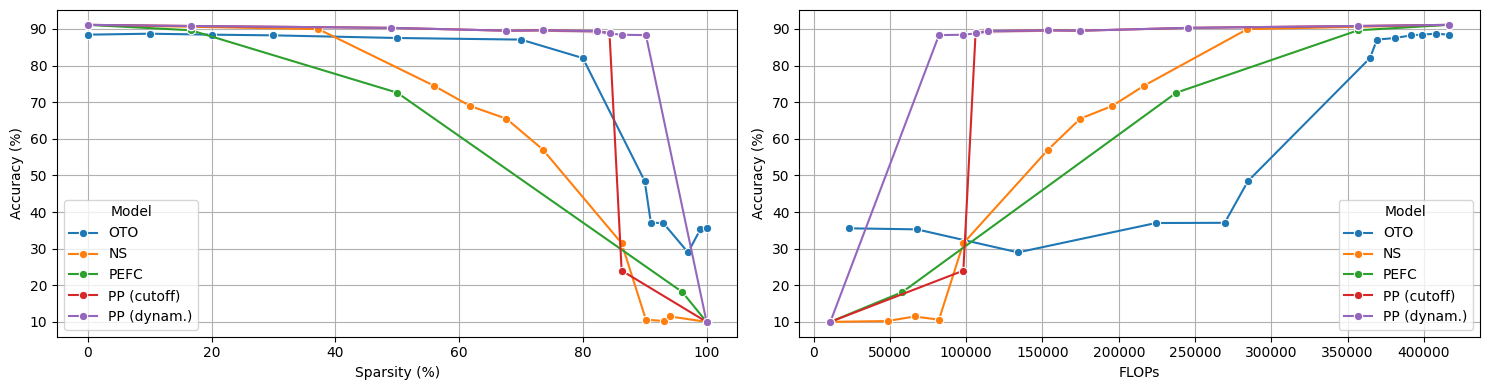

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
plot_accuracy_vs_sparsity(axes[0], ov_df)
plot_accuracy_vs_flops(axes[1], ov_df)

plt.tight_layout()
plt.show()